# Statistical learning methods

In [1]:
# imports and plot customizations
import os
import sys
import pickle
import collections
import copy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import time

class TimeClass():
    def __init__(self):
        pass
    def __enter__(self):
        self.start = time.time()
    def __exit__(self, type, value, traceback):
        self.end = time.time()
        self.elapsed = round(self.end - self.start, 2)
        print('\nFinished executing in {} seconds\n'.format(self.elapsed))

In [3]:
matplotlib.rcParams['xtick.color'] = 'grey'
matplotlib.rcParams['ytick.color'] = 'grey'
matplotlib.rcParams['xtick.major.size'] = 7
matplotlib.rcParams['ytick.major.size'] = 7
# matplotlib.rcParams['xtick.labelsize'] = 10
# matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['xtick.minor.bottom'] = False
matplotlib.rcParams['ytick.minor.left'] = False
matplotlib.rcParams['figure.titlesize'] = 15
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.labelsize'] = 15
matplotlib.rcParams['axes.labelcolor'] = 'grey'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['xtick.major.pad'] = 8
matplotlib.rcParams['ytick.major.pad'] = 8
matplotlib.rcParams['legend.frameon'] = False
matplotlib.rcParams['axes.edgecolor'] = 'grey'
matplotlib.rcParams['text.color'] = 'grey'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['ytick.minor.visible'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['legend.loc'] = 'upper left'
matplotlib.rcParams['figure.constrained_layout.h_pad'] = 0.12
matplotlib.rcParams['figure.constrained_layout.w_pad'] = 0.12

# PCA
# Part 1: PCA
https://stats.stackexchange.com/questions/102882/steps-done-in-factor-analysis-compared-to-steps-done-in-pca/102999#102999

In [6]:
# Load the Iris dataset
iris = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
    )
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X = iris.filter(regex = r'^(?!Species).*$', axis = 1)
Y = pd.get_dummies(iris['Species']).values
print(X.head(), Y)
corr_matrix = X.corr()
print('\nCorrelation matrix:\n', corr_matrix)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2 [[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 

In [168]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
eigenvalues, eigenvectors

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

In [169]:
#A= U D U.T # a simmetric matrix like covariance matrix can be decommposed
(
    eigenvectors
    .dot(np.diag(eigenvalues))
    .dot(eigenvectors.T) 
) # --> correlation matrix

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [170]:
loadings = eigenvectors * np.sqrt(eigenvalues[np.newaxis, :])
loadings

array([[ 0.89122448, -0.35735211, -0.276774  ,  0.03761047],
       [-0.44931298, -0.88835148,  0.09290825, -0.01782003],
       [ 0.99168442, -0.02024682,  0.05408378, -0.11500878],
       [ 0.96499579, -0.06278622,  0.24329495,  0.07515708]])

In [171]:
# The length of the rowvectors of the loadings is 1
np.linalg.norm(loadings, axis = 1)

array([1., 1., 1., 1.])

In [172]:
# the row vectors squared are the proportion of variance of a given variable explained by the given component (like an R squared)
variance_proportions = loadings ** 2
np.round(variance_proportions, 2)

array([[0.79, 0.13, 0.08, 0.  ],
       [0.2 , 0.79, 0.01, 0.  ],
       [0.98, 0.  , 0.  , 0.01],
       [0.93, 0.  , 0.06, 0.01]])

In [173]:
# The variation in each variable is explained entirely by all principal components
np.sum(variance_proportions, axis = 1)

array([1., 1., 1., 1.])

In [174]:
# The sum along each loading vector squared are the eigenvalues themselves
np.sum(variance_proportions, axis = 0)

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

In [13]:
# Variance explained by each component
componennt_variances = eigenvalues / np.sum(variance_proportions)
np.round(componennt_variances, 2)

array([0.73, 0.23, 0.04, 0.01])

In [52]:
# normalize the original matrix
X_norm = (X - np.mean(X, axis=0).values[np.newaxis, :]) / np.std(X, axis=0).values[np.newaxis, :]
X_norm

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [175]:
projections = np.dot(X_norm, eigenvectors)
np.round(projections, 2)[1:10, :]

array([[-2.09,  0.66, -0.23,  0.1 ],
       [-2.37,  0.32,  0.05,  0.03],
       [-2.3 ,  0.58,  0.1 , -0.07],
       [-2.39, -0.67,  0.02, -0.04],
       [-2.07, -1.52,  0.03,  0.  ],
       [-2.45, -0.07,  0.34, -0.04],
       [-2.23, -0.25, -0.08, -0.03],
       [-2.34,  1.1 ,  0.15, -0.03],
       [-2.19,  0.45, -0.25, -0.04]])

In [204]:
# what PCA does is to find a projection where the variables are uncorrelated and each variable has eigenvalues variance 
with np.printoptions(precision=3, suppress=True):
    print(np.cov(projections.T))

[[ 2.93   0.    -0.    -0.   ]
 [ 0.     0.927  0.     0.   ]
 [-0.     0.     0.148  0.   ]
 [-0.     0.     0.     0.021]]


In [31]:
# cov(T,T) = P.T S P = P.T U D U.T P, setting P to U which is the eigenvector matrix, then cov(T, T) becomes D which is the eigenvalues diagonal matrix
# this is the explanation of PCA

with np.printoptions(precision=3, suppress=True):
    print(
        eigenvectors.T
        .dot(corr_matrix)
        .dot(eigenvectors)
    ) # --> eigenvalues on the diagonal

[[ 2.911  0.    -0.    -0.   ]
 [ 0.     0.921 -0.     0.   ]
 [-0.    -0.     0.147  0.   ]
 [-0.     0.    -0.     0.021]]


In [34]:
with np.printoptions(precision=3, suppress=True):
    print(
        eigenvectors.T
        .dot(eigenvectors)
    ) # all eigenvectors are independent

[[ 1.  0.  0. -0.]
 [ 0.  1.  0. -0.]
 [ 0.  0.  1. -0.]
 [-0. -0. -0.  1.]]


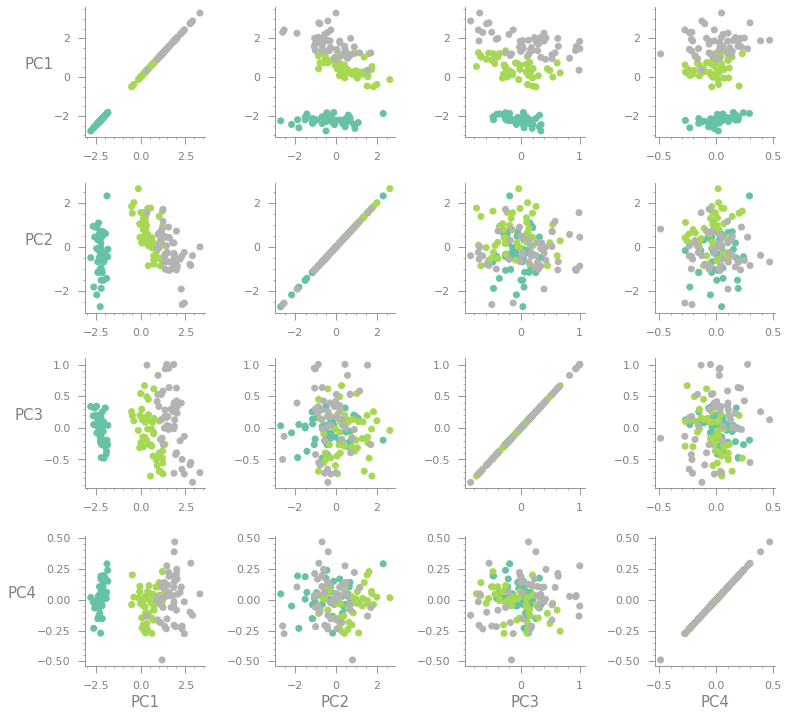

In [54]:
_, ax = plt.subplots(X.shape[1], X.shape[1], constrained_layout = True, figsize = (11,10))
with matplotlib.rc_context(rc = {'xtick.major.pad':3,'ytick.major.pad':3}):
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            ax[i,j].scatter(projections[:, j], projections[:, i], c = iris.Species.astype('category').cat.codes, cmap = 'Set2')
            if  i == X.shape[1] -1:
                ax[i,j].set_xlabel('PC' + str(j+1), color = 'grey', fontsize = 15)
            if  j == 0:
                ax[i,j].set_ylabel('PC' + str(i+1), color = 'grey', fontsize = 15, rotation = 0, labelpad = 15)

# Part 2: PCR (regression)

In [101]:
# each column is a coefficient vector for the each of the 3 categories
# Q.T = (T.T)−1 T.T Y # least square
B = np.linalg.inv(X_norm.T.dot(X_norm)).dot(X_norm.T).dot(Y)
B # --> coefficients

array([[ 0.05417529, -0.01778082, -0.03639448],
       [ 0.10478388, -0.1904494 ,  0.08566552],
       [-0.39173238,  0.38427621,  0.00745618],
       [-0.04818588, -0.3675214 ,  0.41570728]])

In [127]:
Y_hat = X_norm.dot(B).values
Y_hat[0:10, :]

array([[ 0.64803507, -0.21341186, -0.43462321],
       [ 0.51366996,  0.01124984, -0.5249198 ],
       [ 0.57131208, -0.09443448, -0.47687761],
       [ 0.4959482 , -0.00450518, -0.49144302],
       [ 0.66571806, -0.25532795, -0.41039011],
       [ 0.68521849, -0.42723933, -0.25797916],
       [ 0.5846311 , -0.20688812, -0.37774298],
       [ 0.59494732, -0.14533471, -0.44961262],
       [ 0.45660113,  0.06609272, -0.52269385],
       [ 0.52197626,  0.03735056, -0.55932682]])

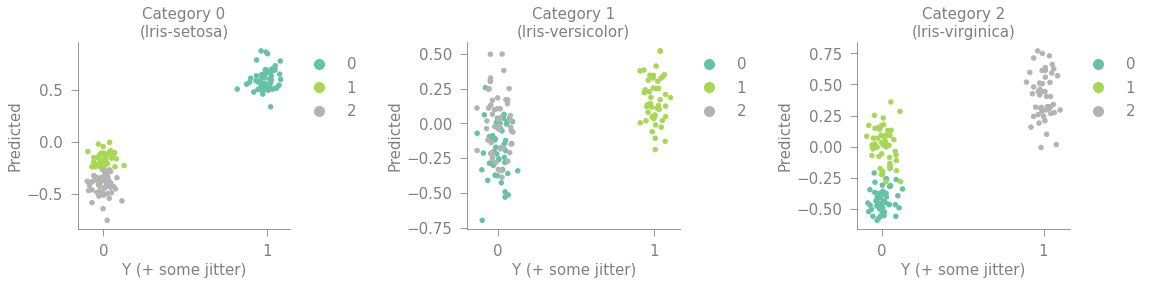

In [265]:
_, ax = plt.subplots(1, 3, figsize=(16, 4), constrained_layout=True)
for i in range(Y_hat.shape[1]):
    pl = ax[i].scatter(
        Y[:, i]+np.random.normal(scale=0.05, size=Y.shape[0]), 
        Y_hat[:, i], 
        s=20, c=iris['Species'].astype('category').cat.codes, cmap = 'Set2'
    )
    ax[i].set(
        xlabel='Y (+ some jitter)', 
        ylabel='Predicted', 
        title=f"Category {i}\n({iris['Species'].astype('category').cat.categories[i]})", 
        xticks=(0,1)
    )
    ax[i].legend(*pl.legend_elements(prop='colors', size = 10), loc='upper left', bbox_to_anchor = (1,1))

!! In the model there is no intercept! the predicted values are constrained on a different scale

In [177]:
W = eigenvectors[:, 0:2] # selected components for regression
T = X_norm.values.dot(W) # T are the projections on the seleced omponents 
W, T[0:10, :]

(array([[ 0.52237162, -0.37231836],
        [-0.26335492, -0.92555649],
        [ 0.58125401, -0.02109478],
        [ 0.56561105, -0.06541577]]),
 array([[-2.26454173, -0.5057039 ],
        [-2.0864255 ,  0.65540473],
        [-2.36795045,  0.31847731],
        [-2.30419716,  0.57536771],
        [-2.38877749, -0.6747674 ],
        [-2.07053681, -1.51854856],
        [-2.44571134, -0.07456268],
        [-2.23384186, -0.24761393],
        [-2.34195768,  1.09514636],
        [-2.18867576,  0.44862905]]))

In [178]:
Q = np.linalg.inv(T.T.dot(T)).dot(T.T).dot(Y)
Q # --> coefficients

array([[-0.2542462 ,  0.05635551,  0.19789068],
       [-0.10573823,  0.19882728, -0.09308905]])

In [179]:
Y_hat_PCR = T.dot(Q)
Y_hat_PCR[0:10, :]

array([[ 0.62922336, -0.22816714, -0.40105622],
       [ 0.46116441,  0.01273076, -0.47389517],
       [ 0.56836717, -0.07012508, -0.49824208],
       [ 0.524995  , -0.01545542, -0.50953958],
       [ 0.6786863 , -0.26878294, -0.40990336],
       [ 0.68699475, -0.41861504, -0.26837971],
       [ 0.62969693, -0.15265441, -0.47704252],
       [ 0.59412806, -0.17512171, -0.41900635],
       [ 0.47963499,  0.08576275, -0.56539774],
       [ 0.50902524, -0.03414425, -0.47488099]])

The coefficients Q can be projected back to the original space as below, just, they will not be the B coefficients found above with the OLS method performed on the whole dataset. They may be similar specially for the highly influencial predictors, but not identical since they were estimated on a portion of the space.

In [180]:
# B = W Q = W(T.T)−1 T.T Y
B, W.dot(Q)

(array([[ 0.05417529, -0.01778082, -0.03639448],
        [ 0.10478388, -0.1904494 ,  0.08566552],
        [-0.39173238,  0.38427621,  0.00745618],
        [-0.04818588, -0.3675214 ,  0.41570728]]),
 array([[-0.09344271, -0.04458853,  0.13803124],
        [ 0.16482369, -0.19886738,  0.03404369],
        [-0.1455511 ,  0.02856265,  0.11698845],
        [-0.13688751,  0.01886886,  0.11801865]]))

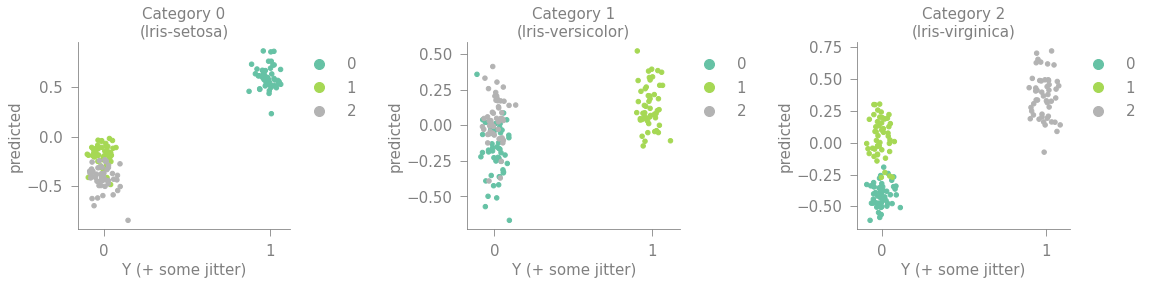

In [264]:
_, ax = plt.subplots(1, 3, figsize=(16, 4), constrained_layout=True)
for i in range(Y_hat_PCR.shape[1]):
    pl = ax[i].scatter(
        Y[:, i]+np.random.normal(scale=0.05, size=Y.shape[0]), 
        Y_hat_PCR[:, i], 
        s=20, c=iris['Species'].astype('category').cat.codes, cmap = 'Set2'
    )
    ax[i].set(
        xlabel='Y (+ some jitter)', 
        ylabel='predicted', 
        title=f"Category {i}\n({iris['Species'].astype('category').cat.categories[i]})", 
        xticks=(0,1)
    )
    ax[i].legend(*pl.legend_elements(prop='colors', size = 10), loc='upper left', bbox_to_anchor = (1,1))

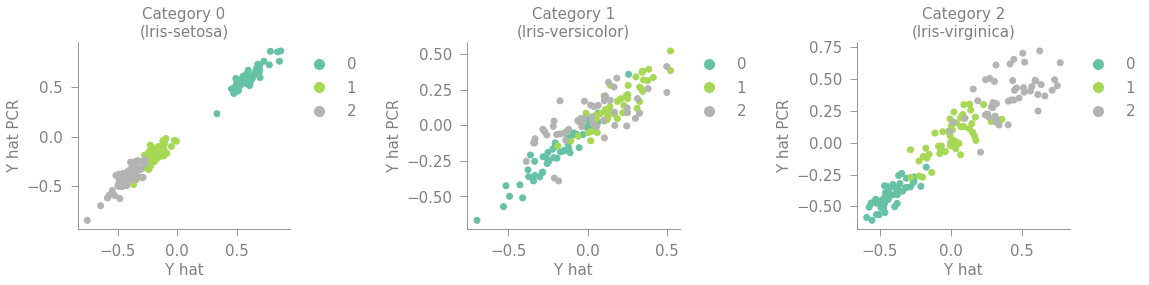

In [261]:
_, ax = plt.subplots(1, 3, figsize=(16, 4), constrained_layout=True)
for i in range(Y_hat.shape[1]):
    ax[i].scatter(Y_hat[:, i], Y_hat_PCR[:, i], c=iris['Species'].astype('category').cat.codes, cmap = 'Set2')
    ax[i].set(
        xlabel='Y hat', 
        ylabel='Y hat PCR', 
        title=f"Category {i}\n({iris['Species'].astype('category').cat.categories[i]})"
    )
    ax[i].legend(*pl.legend_elements(prop='colors', size = 10), loc='upper left', bbox_to_anchor = (1,1))

In [203]:
print(
    'Sum of squares difference between the 2 models / Y sum of squares:\n', 
    (((Y_hat_PCR - Y_hat)**2).sum(axis=0)) / (((Y-Y.mean(axis=0))**2).sum(axis=0))
     )

Sum of squares difference between the 2 models / Y sum of squares:
 [0.01434392 0.05130286 0.06774238]


A similar amount of variation obtained by fitting the model using whole dataset is captured using just the first 2 components.

# Partial Least Squares

PLS: wi = argmax w.T X.T Y Y.T X w  (Maximize covariance with the response)

PCA: wi = argmax w.T X.T       X w  (Maximize variance of the latent components) 

# Part 1: 1 dependent variable

In [239]:
eigenvalues, eigenvectors = np.linalg.eig((X.values.T.dot(Y[:, 0])[:, np.newaxis] * Y[:, 0][np.newaxis, :]).dot(X.values))
eigenvalues, eigenvectors 

(array([ 9.73639800e+04, -7.27595761e-12, -2.20083064e-12,  9.22896885e-15]),
 array([[ 0.80216127, -0.59710744,  0.37759204,  0.03809534],
        [ 0.54770021,  0.735787  , -0.15673952, -0.04406682],
        [ 0.23459131,  0.31515277, -0.90028131,  0.13741939],
        [ 0.03909855,  0.05252546, -0.14950095, -0.98879865]]))

In [233]:
projections = X_norm.dot(eigenvectors[:, :2]).values
projections

array([[-5.23219939e-01,  8.05507295e-01],
       [-1.35130954e+00,  9.88912986e-02],
       [-1.30556319e+00,  5.66196976e-01],
       [-1.50281841e+00,  5.04126687e-01],
       [-4.93676661e-01,  1.04812083e+00],
       [ 3.25627791e-01,  1.33708527e+00],
       [-1.13079985e+00,  1.00390086e+00],
       [-7.33815364e-01,  7.25515622e-01],
       [-1.96402986e+00,  2.90379189e-01],
       [-1.21637029e+00,  2.80170298e-01],
       [ 3.51876825e-02,  9.46904556e-01],
       [-9.14867510e-01,  8.88137480e-01],
       [-1.45364612e+00,  1.64335857e-01],
       [-1.97964758e+00,  4.72322889e-01],
       [ 7.64170129e-01,  1.11452934e+00],
       [ 1.22423317e+00,  1.93550826e+00],
       [ 2.72266991e-01,  1.26539973e+00],
       [-5.18079537e-01,  8.12412973e-01],
       [ 4.85336456e-01,  9.42865586e-01],
       [-1.24520982e-01,  1.34112424e+00],
       [-3.18350272e-01,  4.71957443e-01],
       [-2.46120031e-01,  1.17776662e+00],
       [-9.35822153e-01,  1.26583624e+00],
       [-7.

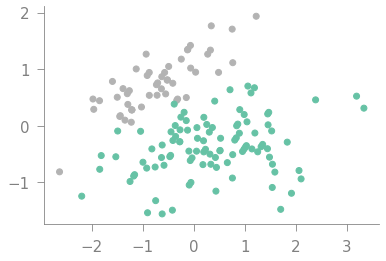

In [234]:
plt.scatter(*projections.T, c=Y[:, 0], cmap='Set2')

# Part 2: Multiple dependent variables

In [8]:
X.values.T.dot(Y).dot(Y.T).dot(X.values)

array([[259244.69, 132864.85, 172981.8 ,  56099.72],
       [132864.85,  70500.75,  83289.5 ,  26330.84],
       [172981.8 ,  83289.5 , 127789.  ,  43135.82],
       [ 56099.72,  26330.84,  43135.82,  14806.22]])

In [245]:
eigenvalues, eigenvectors = np.linalg.eig(X.values.T.dot(Y).dot(Y.T).dot(X.values))
eigenvalues, eigenvectors 

(array([4.57083740e+05, 1.51680748e+04, 8.88452417e+01, 2.81233076e-11]),
 array([[ 0.75124655,  0.28857374,  0.43211375,  0.40697853],
        [ 0.38011273,  0.54014424, -0.61238682, -0.4344432 ],
        [ 0.5127785 , -0.70796507,  0.03734177, -0.48419961],
        [ 0.16793196, -0.35178809, -0.66095816,  0.64123187]]))

In [9]:
# Alternatively, the eigenvalues and eigenvectors can be found with SVD
np.linalg.svd(X.values.T.dot(Y).dot(Y.T).dot(X.values))

(array([[-0.75124655, -0.28857374,  0.43211375,  0.40697853],
        [-0.38011273, -0.54014424, -0.61238682, -0.4344432 ],
        [-0.5127785 ,  0.70796507,  0.03734177, -0.48419961],
        [-0.16793196,  0.35178809, -0.66095816,  0.64123187]]),
 array([4.57083740e+05, 1.51680748e+04, 8.88452417e+01, 2.77964572e-11]),
 array([[-0.75124655, -0.38011273, -0.5127785 , -0.16793196],
        [-0.28857374, -0.54014424,  0.70796507,  0.35178809],
        [ 0.43211375, -0.61238682,  0.03734177, -0.66095816],
        [ 0.40697853, -0.4344432 , -0.48419961,  0.64123187]]))

In [255]:
projections = X_norm.dot(eigenvectors).values
np.round(projections, 2)[:10, :]

array([[-1.19,  1.71, -0.2 , -1.01],
       [-1.81,  1.01,  0.4 , -0.6 ],
       [-1.85,  1.23,  0.01, -0.88],
       [-1.97,  0.99,  0.1 , -0.88],
       [-1.2 ,  1.8 , -0.4 , -1.16],
       [-0.44,  2.1 , -0.78, -1.18],
       [-1.71,  1.36, -0.41, -1.07],
       [-1.34,  1.51, -0.11, -0.98],
       [-2.36,  0.71,  0.28, -0.75],
       [-1.72,  1.15,  0.35, -0.82]])

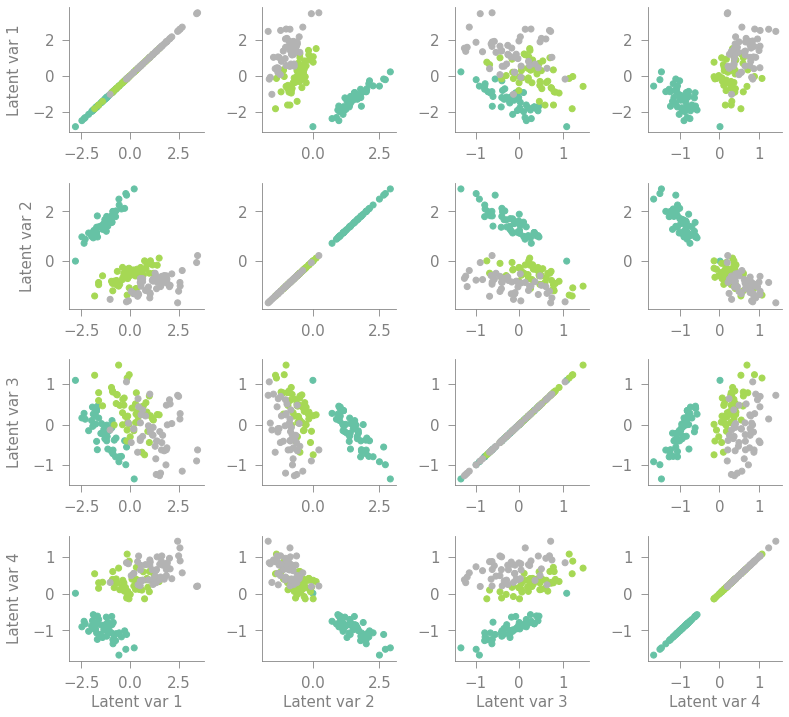

In [257]:
_, ax = plt.subplots(X.shape[1], X.shape[1], constrained_layout = True, figsize = (11,10))
with matplotlib.rc_context(rc = {'xtick.major.pad':3,'ytick.major.pad':3}):
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            ax[i,j].scatter(projections[:, j], projections[:, i], c = iris.Species.astype('category').cat.codes, cmap = 'Set2')
            if  i == X.shape[1] -1:
                ax[i,j].set_xlabel('Latent var ' + str(j+1), color = 'grey')
            if  j == 0:
                ax[i,j].set_ylabel('Latent var ' + str(i+1), color = 'grey', labelpad = 10)

# LDA

# Part 1: dimension reduction

In [4]:
iris = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

iris.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
iris.dropna(how="all", inplace=True) # to drop the empty line at file-end

iris.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
from sklearn.preprocessing import LabelEncoder

X = iris.iloc(axis=1)[[0,1,2,3]].values
y = iris['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)

y = label_encoder.transform(y) + 1

#label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}
label_dict = {i+1:nm for i, nm in enumerate(label_encoder.classes_)}
label_dict

{1: 'Iris-setosa', 2: 'Iris-versicolor', 3: 'Iris-virginica'}

In [7]:
import sklearn.model_selection

X, X_test, y, y_test = sklearn.model_selection.train_test_split(X, y, train_size = 0.9)

X, X_test, y, y_test

(array([[6.3, 3.3, 6. , 2.5],
        [6.7, 3.1, 4.7, 1.5],
        [5.9, 3. , 4.2, 1.5],
        [6.2, 3.4, 5.4, 2.3],
        [5.1, 3.4, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [7.2, 3. , 5.8, 1.6],
        [4.9, 3. , 1.4, 0.2],
        [6.7, 3.3, 5.7, 2.1],
        [6.3, 3.4, 5.6, 2.4],
        [6.2, 2.9, 4.3, 1.3],
        [4.7, 3.2, 1.3, 0.2],
        [5.6, 3. , 4.5, 1.5],
        [5.5, 2.4, 3.8, 1.1],
        [7.6, 3. , 6.6, 2.1],
        [4.8, 3. , 1.4, 0.1],
        [6.3, 2.8, 5.1, 1.5],
        [5.1, 3.8, 1.5, 0.3],
        [6.7, 2.5, 5.8, 1.8],
        [4.4, 3. , 1.3, 0.2],
        [6.5, 3.2, 5.1, 2. ],
        [6.1, 2.9, 4.7, 1.4],
        [6.7, 3. , 5.2, 2.3],
        [4.9, 3.1, 1.5, 0.1],
        [6.4, 3.1, 5.5, 1.8],
        [6.1, 3. , 4.6, 1.4],
        [5.5, 4.2, 1.4, 0.2],
        [4.9, 2.4, 3.3, 1. ],
        [5.5, 3.5, 1.3, 0.2],
        [6. , 2.9, 4.5, 1.5],
        [4.8, 3.1, 1.6, 0.2],
        [5.7, 3. , 4.2, 1.2],
        [5.6, 2.8, 4.9, 2. ],
        [5

In [8]:
mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.02553191 3.43829787 1.46808511 0.24893617]

Mean Vector class 2: [5.93555556 2.80888889 4.28222222 1.34222222]

Mean Vector class 3: [6.56976744 2.94651163 5.57209302 2.01395349]



In [9]:
# the same in pandas
iris.groupby('class label')\
.mean(0)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
class label,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [10]:
# within groups scatter matrix (basically the covariance multiplied by the class number of samples). 
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)


within-class Scatter Matrix:
 [[34.94317049 11.80028545 22.14046325  4.65186058]
 [11.80028545 14.77448502  6.82037187  3.97711903]
 [22.14046325  6.82037187 24.53441707  5.46392622]
 [ 4.65186058  3.97711903  5.46392622  5.29885249]]


In [18]:
# or same thing in pandas
S_W = pd.DataFrame.groupby(pd.DataFrame(X), by = y)\
.apply(lambda x: (x.shape[0]-1)*x.cov())\
.groupby(level = 1, sort = False)\
.agg(np.sum)

S_W

,0,1,2,3
0,34.943170,11.800285,22.140463,4.651861
1,11.800285,14.774485,6.820372,3.977119
2,22.140463,6.820372,24.534417,5.463926
3,4.651861,3.977119,5.463926,5.298852


In [13]:
#Between classes scatter matrix
S_B = [np.multiply.outer((x - np.mean(X, axis = 0)), (x - np.mean(X, axis = 0))) for x in mean_vectors]
S_B = np.array([mat*size for mat, size in zip(S_B, iris.groupby('class label').size().to_list())]) # multiply each matrix by the size of the group
S_B = np.sum(S_B, axis = 0)

S_B

array([[ 60.32902587, -20.7738164 , 162.15093587,  69.19870769],
       [-20.7738164 ,  10.95711888, -60.26681707, -24.42340657],
       [162.15093587, -60.26681707, 440.98808767, 186.68428142],
       [ 69.19870769, -24.42340657, 186.68428142,  79.46561784]])

In [14]:
# calculate S_B / S_W (or, to express it as matrix algebra: inv(S_W) dot S_B)

S_B_to_S_W = np.dot(np.linalg.inv(S_W), S_B)
print(S_B_to_S_W)

# find the eigenvalues and eigenvectors. In numpy, they are already sorted from highest eigenvalue
eig_vals, eig_vecs = np.linalg.eig(S_B_to_S_W)
eig_vals, eig_vecs

[[ -3.05882269   1.1697546   -8.35712298  -3.5267671 ]
 [ -5.55592683   2.23840418 -15.31202261  -6.42368075]
 [  8.01066488  -3.09599161  21.92416027   9.24124685]
 [ 10.31479874  -3.67182217  27.86367754  11.85008239]]


(array([3.27528445e+01, 2.00979686e-01, 1.48451973e-15, 9.07362106e-18]),
 array([[-0.21164857, -0.06291854, -0.21437941, -0.67866068],
        [-0.38840771, -0.5336481 ,  0.41292203,  0.47668119],
        [ 0.55541924,  0.28483884,  0.45634534,  0.45309701],
        [ 0.70416887, -0.7938059 , -0.75847597, -0.32695232]]))

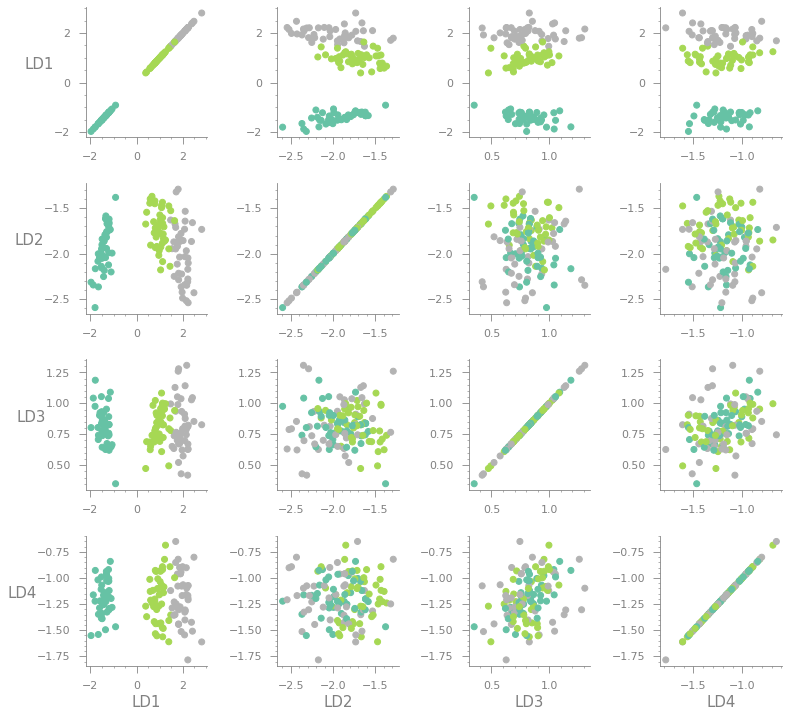

In [15]:
projections = np.dot(X, eig_vecs)

_, ax = plt.subplots(X.shape[1], X.shape[1], constrained_layout = True, figsize = (11,10))
with matplotlib.rc_context(rc = {'xtick.major.pad':3,'ytick.major.pad':3}):
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            ax[i,j].scatter(projections[:, j], projections[:, i], c = y, cmap = 'Set2')
            if  i == X.shape[1] -1:
                ax[i,j].set_xlabel('LD' + str(j+1), color = 'grey', fontsize = 15)
            if  j == 0:
                ax[i,j].set_ylabel('LD' + str(i+1), color = 'grey', fontsize = 15, rotation = 0, labelpad = 15)

# LDA Part 2: 
# Classification

In [152]:
class QdaClassification():
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def fit(self):
        self.labels = np.unique(self.y)
        self.S_W_covariances = [ df.cov() for _, df in pd.DataFrame.groupby(pd.DataFrame(self.X), by = self.y) ] 
        self.classes_means = pd.DataFrame.groupby(pd.DataFrame(self.X), self.y).mean(0).values.tolist()
        self.p_priors = (np.unique(self.y, return_counts=True)[1]/len(self.y)).tolist()
    def log_bayesian_p(self, x_, mean_vector, cov_matrix, p_prior):
            return \
                    - 0.5*np.log(np.linalg.det(cov_matrix)) \
                    - 0.5*(x_-mean_vector).T.dot(np.linalg.inv(cov_matrix)).dot(x_-mean_vector) \
                    + np.log(p_prior) 
                    # the term corresponding to the denominator of the Bayesian formula 
                    # the one that integrate the posterior to 1, is missing and therefore, 
                    # in this cast if one looks at the (log) posterior values they may exceed o 
    def predict(self, X):
        log_p = []
        for i in range(X.shape[0]):
            log_p.append(
                list(map(lambda args: self.log_bayesian_p(X[i, :], *args), zip(self.classes_means, self.S_W_covariances, self.p_priors)))
            )
        log_p = np.array(log_p)
        return self.labels[np.argmax(log_p, axis = 1)]


In [153]:
lda_classification_test = QdaClassification(X, y)
lda_classification_test.fit()
print('lda classification:\n', lda_classification_test.predict(X_test))
print('test:\n', y_test)


lda classification:
 [3 2 1 2 2 2 3 3 3 2 1 1 3 3 3]
test:
 [3 2 1 2 2 2 3 3 3 2 1 1 3 3 3]
